In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging
logging.basicConfig(level=logging.INFO)
%time import shnitsel.dynamic.datasheet as D

INFO:rdkit:Enabling RDKit 2024.03.6 jupyter extensions


CPU times: user 7.61 s, sys: 882 ms, total: 8.49 s
Wall time: 8.57 s


In [2]:
sheet = D.Datasheet(path='/nc/Theo_SHNITSEL/filtered/traj_C2H4_noS2.nc', spectra_times=[0, 10, 20, 30])

In [3]:
%time sheet.calc_all()

INFO:root:cached per_state in 0.6720511519815773 s
INFO:root:cached inter_state in 0.724583464092575 s
INFO:root:cached pops in 7.054502706043422 s
INFO:root:cached delta_E in 10.714780268026516 s
INFO:root:cached fosc_time in 10.805396270938218 s
INFO:root:cached spectra in 0.732826565974392 s
INFO:root:cached spectra_groups in 3.1434930860996246e-05 s
INFO:root:cached noodle in 2.0402574129402637 s


CPU times: user 31.4 s, sys: 1.15 s, total: 32.6 s
Wall time: 32.8 s


INFO:root:finished plot_per_state_histograms in 4.012455655960366 s


CPU times: user 3.91 s, sys: 21 ms, total: 3.93 s
Wall time: 4.01 s


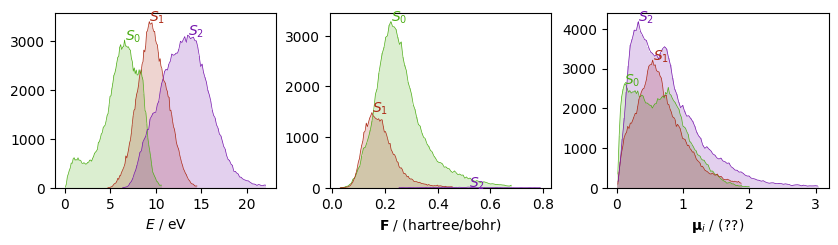

In [4]:
%time sheet.plot_per_state_histograms()

CPU times: user 307 ms, sys: 6.73 ms, total: 313 ms
Wall time: 316 ms


{'pop': <Axes: label='pop', ylabel='Population'>,
 'de': <Axes: label='de', ylabel='$\\Delta E$'>,
 'ft': <Axes: label='ft', xlabel='$t$ / fs', ylabel='$f_\\mathrm{osc}$'>}

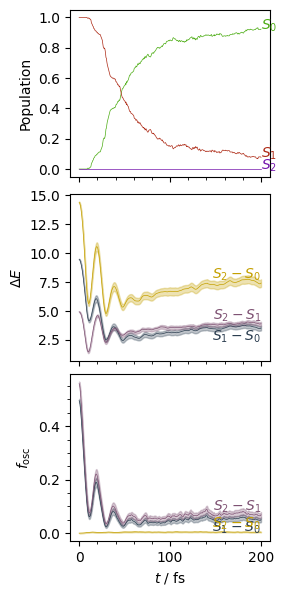

In [5]:
%time sheet.plot_timeplots()

CPU times: user 2.71 s, sys: 3 ms, total: 2.71 s
Wall time: 2.76 s


{'sg': <Axes: label='sg', ylabel='$f_\\mathrm{osc}$'>,
 't0': <Axes: label='t0', ylabel='$\\|\\mathbf{\\mu}_{2,0}\\|_2$'>,
 't1': <Axes: label='t1', ylabel='$\\|\\mathbf{\\mu}_{1,0}\\|_2$'>,
 'se': <Axes: label='se', title={'center': '$\\uparrow$ground state\n$\\downarrow$excited state absorption'}, ylabel='$f_\\mathrm{osc}$'>,
 't2': <Axes: label='t2', xlabel='$\\Delta E$ / eV', ylabel='$\\|\\mathbf{\\mu}_{2,1}\\|_2$'>,
 'cb_spec': <Axes: label='cb_spec', xlabel='time / fs'>,
 'cb_hist': <Axes: label='cb_hist', xlabel='# data points'>}

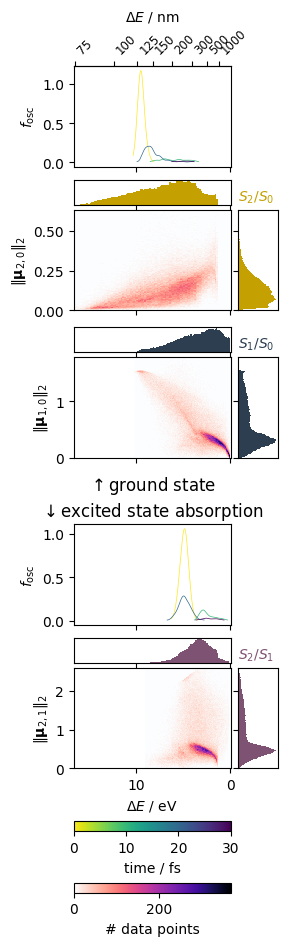

In [6]:
%time sheet.plot_separated_spectra_and_hists()

INFO:root:finished plot_timeplots in 0.2573537649586797 s
INFO:root:finished plot_separated_spectra_and_hists in 3.1661983110243455 s
INFO:root:finished plot_nacs_histograms in 1.781836737995036 s
INFO:root:finished plot_noodle in 9.868963644956239 s
INFO:root:finished plot_structure in 0.07423153205309063 s


C=C InChI=1S/C2H4/c1-2/h1-2H2
CPU times: user 15.3 s, sys: 203 ms, total: 15.5 s
Wall time: 15.8 s


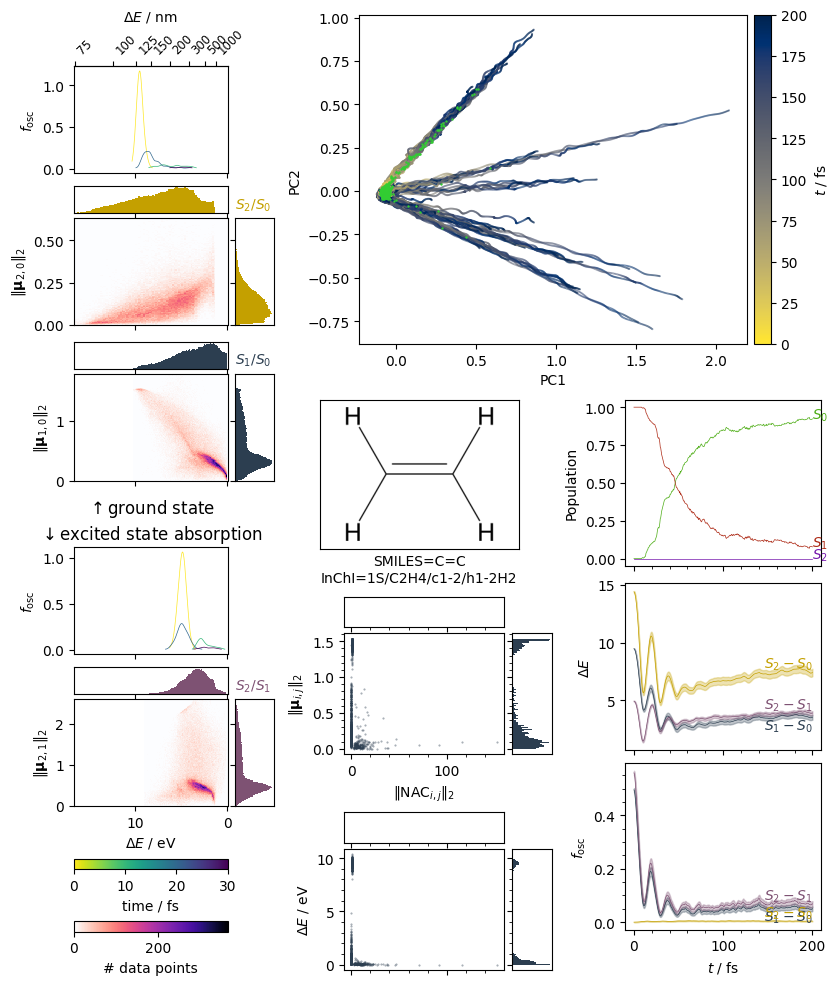

In [5]:
%time fig = sheet.plot()

In [7]:
fig.savefig('/tmp/ethene.png')